In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import seaborn as sns

### 데이터 로드

In [4]:
mc_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset/modcloth.xlsx')
mc_df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [5]:
rr_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset/renttherunway.xlsx')
rr_df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [6]:
#mc_df.columns

mc_df.columns = ['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [7]:
#rr_df.columns

rr_df.columns = ['fit', 'user_id', 'bust_size', 'item_id', 'weight', 'rating',
       'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date']

In [8]:
#modcloth_final_data 데이터와 renttherunway데이터 통합을 위한 복사본 생성

mc_df.loc[37313, 'bust'] = 38
mc_df['bust'] = mc_df['bust'].astype('float')

mc_df_cp = mc_df.copy()
rr_df_cp = rr_df.copy()

### 데이터 1차 정제 후 엑셀 저장(mc_df_cp2.xlsx, rr_df_cp2.xlsx)

In [9]:
#modcloth_final_data 데이터 전처리

mc_df_cp.rename(columns={'quality':'rating', 'bra_size':'bust_size'}, inplace = True)

mc_df_cp.drop(['shoe_size', 'shoe_width'], axis = 1, inplace = True)

mc_df_cp.drop(['bust'], axis = 1, inplace = True)

mc_df_cp.drop(mc_df_cp[np.isnan(mc_df_cp['rating'])].index, inplace = True)

mc_df_cp.drop(mc_df_cp[mc_df_cp['height'].isnull()].index, inplace = True)

mc_df_cp.drop(mc_df_cp[(mc_df_cp['review_summary'].isnull()) | (mc_df_cp['review_text'].isnull())].index, inplace = True)

mc_df_cp.drop_duplicates(inplace = True)
#75001 rows × 16 columns -> 74642 rows × 16 columns

#mc_df_cp.drop(['waist', 'hips', 'user_name'], axis = 1, inplace = True)

mc_df_cp['rating'] = mc_df_cp['rating']*2


In [10]:
#renttherunway 데이터 전처리

#rr_df_cp.drop(rr_df_cp[rr_df_cp['bust_size'].isnull()].index, inplace = True)

rr_df_cp['cup_size'] = rr_df_cp['bust_size'].str[2:]
rr_df_cp['bust_size'] = rr_df_cp['bust_size'].str[:2]
rr_df_cp['bust_size'] = rr_df_cp['bust_size'].astype('float')

rr_df_cp.drop(rr_df_cp[(rr_df_cp['review_summary'].isnull()) | (rr_df_cp['review_text'].isnull())].index, inplace = True)

rr_df_cp.drop(rr_df_cp[np.isnan(rr_df_cp['rating'])].index, inplace = True)

rr_df_cp.drop(rr_df_cp[rr_df_cp['height'].isnull()].index, inplace = True)

rr_df_cp.drop_duplicates(inplace = True)
#192544 rows × 16 columns -> 192355 rows × 16 columns

rr_df_cp['weight'] = rr_df_cp['weight'].str[:-3]
rr_df_cp['weight'] = rr_df_cp['weight'].astype('float')
rr_df_cp['weight'] = rr_df_cp['weight']*0.454

#rr_df_cp.drop(['weight', 'rented_for', 'body_type', 'age', 'review_date'], axis = 1, inplace = True)

rr_df_cp['weight'].value_counts()

59.020     14293
61.290     13608
56.750     12782
63.560     12116
54.480     10638
           ...  
113.046        1
118.494        1
123.942        1
31.780         1
113.954        1
Name: weight, Length: 190, dtype: int64

In [ ]:
def convert_cup_size_to_cms(cup_size_code):
  if cup_size_code == 'aa':
    return 10.5
  if cup_size_code == 'a':
    return 12.5
  if cup_size_code == 'b':
    return 14.5
  if cup_size_code == 'c':
    return 16.5
  if cup_size_code == 'd':
    return 18.5
  if cup_size_code == 'd+':
    return 19.5
  if (cup_size_code == 'dd/e') | (cup_size_code == 'dd'):
    return 20.5
  if cup_size_code == 'ddd/f':
    return 22.5
  if cup_size_code == 'dddd/g':
    return 24.5
  if cup_size_code == 'h':
    return 26.5
  if cup_size_code == 'i':
    return 28.5
  if cup_size_code == 'j':
    return 30.5
  if cup_size_code == 'k':
    return 32.5 
  else:
    return np.NAN#str('unknown')

In [ ]:
mc_df_cp['cup_size_in_cms'] = mc_df_cp.cup_size.apply(convert_cup_size_to_cms)
mc_df_cp['cup_size_in_cms'] = mc_df_cp['cup_size_in_cms'].astype('float')
mc_df_cp.drop(['cup_size'], axis=1, inplace=True)

In [ ]:
rr_df_cp['cup_size_in_cms'] = rr_df_cp.cup_size.apply(convert_cup_size_to_cms)
rr_df_cp['cup_size_in_cms'] = rr_df_cp['cup_size_in_cms'].astype('float')
rr_df_cp.drop(['cup_size'], axis=1, inplace=True)

In [ ]:
# modcloth_final_data 데이터의 bust_size 가 대다수 누락되어 있으므로
# bust_size 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 'length' == 'just right'인 구매건에 대해 
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 들의  'fit' == 'fit'이고 'length' == 'just right'인 다른 구매건에 해당하는 고객의 bust_size 사이즈들의 평균을 구해서 
# bust_size 데이터가 누락된 user_id 리스트 각각에 대입

g_by_userid = mc_df_cp[mc_df_cp['bust_size'].isnull() == True].groupby('user_id', axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

user_missing_cnt = user_missing_cnt.rename_axis('user_id').reset_index()

#user_missing_cnt_10 = user_missing_cnt.head(10)


hip_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'bust_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)

#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt.iterrows():
  item_list = mc_df_cp[(mc_df_cp['user_id'] == row[0]) & (mc_df_cp['length'] == 'just right') & (mc_df_cp['fit'] == 'fit')][['user_id', 'item_id', 'size']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      bust_mean = mc_df_cp[(mc_df_cp['item_id'] == item_list['item_id'][i]) & (mc_df_cp['fit'] == 'fit') & (mc_df_cp['length'] == 'just right') & (mc_df_cp['size'] == item_list['size'][i])]['bust_size'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'bust_mean' : bust_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
#12분 48초 소요

new_df_gby = new_df.groupby('user_id', axis = 0).mean()

for index, row in new_df_gby.iterrows():
    if(np.isnan(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size']).all()):
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size'] = row['bust_mean']
    else : 
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size'] = np.mean(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'bust_size'])




# modcloth_final_data 데이터의 hips 가 대다수 누락되어 있으므로
# hips 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 'length' == 'just right'인 구매건에 대해 
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 들의  'fit' == 'fit'이고 'length' == 'just right'인 다른 구매건에 해당하는 고객의 hips 사이즈들의 평균을 구해서 
# hips 데이터가 누락된 user_id 리스트 각각에 대입

g_by_userid = mc_df_cp[mc_df_cp['hips'].isnull() == True].groupby('user_id', axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

user_missing_cnt = user_missing_cnt.rename_axis('user_id').reset_index()

#user_missing_cnt_10 = user_missing_cnt.head(10)


hip_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'hip_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)

#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt.iterrows():
  item_list = mc_df_cp[(mc_df_cp['user_id'] == row[0]) & (mc_df_cp['length'] == 'just right') & (mc_df_cp['fit'] == 'fit')][['user_id', 'item_id', 'size']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      hip_mean = mc_df_cp[(mc_df_cp['item_id'] == item_list['item_id'][i]) & (mc_df_cp['fit'] == 'fit') & (mc_df_cp['length'] == 'just right') & (mc_df_cp['size'] == item_list['size'][i])]['hips'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'hip_mean' : hip_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
#12분 48초 소요

new_df_gby = new_df.groupby('user_id', axis = 0).mean()

for index, row in new_df_gby.iterrows():
    if(np.isnan(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'hips']).all()):
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'hips'] = row['hip_mean']
    else : 
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'hips'] = np.mean(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'hips'])



# modcloth_final_data 데이터의 waist 가 누락되어 있으므로
# waist 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 'length' == 'just right'인 구매건에 대해 
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 들의  'fit' == 'fit'이고 'length' == 'just right'인 다른 구매건에 해당하는 고객의 waist 사이즈들의 평균을 구해서 
# waist 데이터가 누락된 user_id 리스트 각각에 대입

g_by_userid = mc_df_cp[mc_df_cp['waist'].isnull() == True].groupby('user_id', axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

user_missing_cnt = user_missing_cnt.rename_axis('user_id').reset_index()

#user_missing_cnt_10 = user_missing_cnt.head(10)


waist_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'waist_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)

#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt.iterrows():
  item_list = mc_df_cp[(mc_df_cp['user_id'] == row[0]) & (mc_df_cp['length'] == 'just right') & (mc_df_cp['fit'] == 'fit')][['user_id', 'item_id', 'size']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      waist_mean = mc_df_cp[(mc_df_cp['item_id'] == item_list['item_id'][i]) & (mc_df_cp['fit'] == 'fit') & (mc_df_cp['length'] == 'just right') & (mc_df_cp['size'] == item_list['size'][i])]['waist'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'waist_mean' : waist_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
#12분 48초 소요

new_df_gby = new_df.groupby('user_id', axis = 0).mean()

for index, row in new_df_gby.iterrows():
    if(np.isnan(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'waist']).all()):
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'waist'] = row['waist_mean']
    else : 
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'waist'] = np.mean(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'waist'])






# modcloth_final_data 데이터의 cup_size_in_cms 가 누락되어 있으므로
# cup_size_in_cms 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 bodt type 가 일치하는 구매건에 대해  
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 들의  'fit' == 'fit'이고 'length' == 'just right'인 다른 구매건에 해당하는 고객의 cup_size_in_cms 사이즈들의 평균을 구해서 
# cup_size_in_cms 데이터가 누락된 user_id 리스트 각각에 대입

g_by_userid = mc_df_cp[mc_df_cp['cup_size_in_cms'].isnull() == True].groupby(['user_id'], axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

user_missing_cnt = user_missing_cnt.rename_axis(['user_id']).reset_index()

#user_missing_cnt_10 = user_missing_cnt.head(10)


cup_size_in_cms_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'cup_size_in_cms_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)

#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt.iterrows():
  item_list = mc_df_cp[(mc_df_cp['user_id'] == row[0]) & (mc_df_cp['length'] == 'just right') & (mc_df_cp['fit'] == 'fit')][['user_id', 'item_id', 'size']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      cup_size_in_cms_mean = mc_df_cp[(mc_df_cp['item_id'] == item_list['item_id'][i]) & (mc_df_cp['fit'] == 'fit') & (mc_df_cp['length'] == 'just right') & (mc_df_cp['size'] == item_list['size'][i])]['cup_size_in_cms'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'cup_size_in_cms_mean' : cup_size_in_cms_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
#12분 48초 소요

new_df_gby = new_df.groupby('user_id', axis = 0).mean()

for index, row in new_df_gby.iterrows():
    if(np.isnan(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'cup_size_in_cms']).all()):
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'cup_size_in_cms'] = row['cup_size_in_cms_mean']
    else : 
        mc_df_cp.loc[mc_df_cp['user_id'] == index, 'cup_size_in_cms'] = np.mean(mc_df_cp.loc[mc_df_cp['user_id'] == index, 'cup_size_in_cms'])
		



os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')

mc_df_cp.to_excel('mc_df_cp2.xlsx', index = False)


In [ ]:

#mc_df_cp = pd.read_excel('mc_df_cp2.xlsx')
#rr_df_cp = pd.read_excel('rr_df_cp2.xlsx')

In [ ]:
rr_df_cp.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,cup_size_in_cms
0,fit,420272,34.0,2260466,62.198,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",18.5
1,fit,273551,34.0,153475,59.928,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",14.5
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",NaN
3,fit,909926,34.0,126335,61.290,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",16.5
4,fit,151944,34.0,616682,65.830,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",14.5


In [ ]:
mc_rr_df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265678 entries, 0 to 265677
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          265678 non-null  int64  
 1   waist            55280 non-null   float64
 2   size             265678 non-null  int64  
 3   rating           265678 non-null  int64  
 4   hips             67362 non-null   float64
 5   bust_size        254547 non-null  float64
 6   category         265678 non-null  object 
 7   height           265678 non-null  float64
 8   user_name        74542 non-null   object 
 9   length           74518 non-null   object 
 10  fit              265678 non-null  object 
 11  user_id          265678 non-null  int64  
 12  review_summary   265678 non-null  object 
 13  review_text      265678 non-null  object 
 14  cup_size_in_cms  253324 non-null  float64
 15  weight           179406 non-null  float64
 16  rented_for       191136 non-null  obje

In [ ]:
mc_df_cp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74642 entries, 0 to 74641
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74642 non-null  int64  
 1   waist            55357 non-null  float64
 2   size             74642 non-null  int64  
 3   rating           74642 non-null  int64  
 4   hips             67448 non-null  float64
 5   bust_size        72674 non-null  float64
 6   category         74642 non-null  object 
 7   height           74642 non-null  object 
 8   user_name        74642 non-null  object 
 9   length           74618 non-null  object 
 10  fit              74642 non-null  object 
 11  user_id          74642 non-null  int64  
 12  review_summary   74642 non-null  object 
 13  review_text      74642 non-null  object 
 14  cup_size_in_cms  72615 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 8.5+ MB


In [ ]:
rr_df_cp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191223 entries, 0 to 191222
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              191223 non-null  object 
 1   user_id          191223 non-null  int64  
 2   bust_size        182044 non-null  float64
 3   item_id          191223 non-null  int64  
 4   weight           179477 non-null  float64
 5   rating           191223 non-null  int64  
 6   rented_for       191223 non-null  object 
 7   review_text      191223 non-null  object 
 8   body_type        176760 non-null  object 
 9   review_summary   191223 non-null  object 
 10  category         191223 non-null  object 
 11  height           191223 non-null  object 
 12  size             191223 non-null  int64  
 13  age              190278 non-null  float64
 14  review_date      191223 non-null  object 
 15  cup_size_in_cms  180881 non-null  float64
dtypes: float64(4), int64(4), object(8)
mem

In [ ]:
rr_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191223 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              191223 non-null  object 
 1   user_id          191223 non-null  int64  
 2   bust_size        173045 non-null  float64
 3   item_id          191223 non-null  int64  
 4   weight           161588 non-null  float64
 5   rating           191223 non-null  float64
 6   rented_for       191223 non-null  object 
 7   review_text      191223 non-null  object 
 8   body_type        176760 non-null  object 
 9   review_summary   191223 non-null  object 
 10  category         191223 non-null  object 
 11  height           191223 non-null  object 
 12  size             191223 non-null  int64  
 13  age              190278 non-null  float64
 14  review_date      191223 non-null  object 
 15  cup_size_in_cms  169578 non-null  float64
dtypes: float64(5), int64(3), object(8)
mem

In [ ]:
rr_df_cp['weight'].value_counts()

130lbs    14293
135lbs    13608
125lbs    12782
140lbs    12116
120lbs    10638
          ...  
249lbs        1
261lbs        1
273lbs        1
70lbs         1
251lbs        1
Name: weight, Length: 190, dtype: int64

In [ ]:
#사용자 아이디별 특정컬럼의 유일한 갯수 세기(개수가 1이상인 것 검출)
#https://www.delftstack.com/ko/howto/python-pandas/how-to-count-unique-values-with-pandas-per-groups/
#g_by_user = mc_df_cp.groupby(['user_id'], axis = 0)
#g_by_user[g_by_user['bust_size'].unique() > 1]
#mc_df_cp[mc_df_cp.groupby('user_id')["bust_size"].unique() > 1]
#rr_df_cp[rr_df_cp.groupby('user_id')["body_type"].unique().value_counts() > 1]
#위와 같은 방식으로 해보려 했지만 오류나고 안됨


mc_df_cp_gby = pd.DataFrame({'size_list' : mc_df_cp.groupby('user_id')["category"].unique()})

#user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

mc_df_cp_gby = mc_df_cp_gby.rename_axis('user_id').reset_index()

#mc_df_cp_gby.reset_index(inplace = True)

leng = len(mc_df_cp_gby)

new_df = pd.DataFrame(columns = {'user_id', 'category'})
new_df.drop(new_df.index, axis = 0, inplace = True)

for i in range(leng) : 
    if(len(mc_df_cp_gby['size_list'][i]) > 1) : 
        print(str(i) + "len(mc_df_cp_gby['size_list'][i]) >> " + str(len(mc_df_cp_gby['size_list'][i])))
        df_temp = pd.DataFrame({'user_id' : mc_df_cp_gby['user_id'], 'category' : mc_df_cp_gby['size_list']})
        new_df = new_df.append(df_temp, ignore_index = True)


rr_df_cp_gby = pd.DataFrame({'body_type_list' : rr_df_cp.groupby('user_id')["body_type"].unique()})
rr_df_cp_gby = rr_df_cp_gby.rename_axis('user_id').reset_index()

leng = len(rr_df_cp_gby)

new_df = pd.DataFrame(columns = {'user_id', 'body_type_list'})
new_df.drop(new_df.index, axis = 0, inplace = True)

for i in range(leng) : 
    if(len(rr_df_cp_gby['body_type_list'][i]) > 1) : 
        print(str(i) + "len(rr_df_cp_gby['body_type_list'][i]) >> " + str(len(rr_df_cp_gby['body_type_list'][i])))
        df_temp = pd.DataFrame({'user_id' : rr_df_cp_gby['user_id'], 'body_type_list' : rr_df_cp_gby['body_type_list']})
        new_df = new_df.append(df_temp, ignore_index = True)



,user_id,body_type_list


In [ ]:
rr_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191223 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              191223 non-null  object 
 1   user_id          191223 non-null  int64  
 2   bust_size        173045 non-null  float64
 3   item_id          191223 non-null  int64  
 4   weight           161588 non-null  float64
 5   rating           191223 non-null  float64
 6   rented_for       191223 non-null  object 
 7   review_text      191223 non-null  object 
 8   body_type        176760 non-null  object 
 9   review_summary   191223 non-null  object 
 10  category         191223 non-null  object 
 11  height           191223 non-null  object 
 12  size             191223 non-null  int64  
 13  age              190278 non-null  float64
 14  review_date      191223 non-null  object 
 15  cup_size_in_cms  169578 non-null  float64
dtypes: float64(5), int64(3), object(8)
mem

In [ ]:
rr_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191223 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              191223 non-null  object 
 1   user_id          191223 non-null  int64  
 2   bust_size        181985 non-null  float64
 3   item_id          191223 non-null  int64  
 4   weight           179236 non-null  float64
 5   rating           191223 non-null  float64
 6   rented_for       191223 non-null  object 
 7   review_text      191223 non-null  object 
 8   body_type        176760 non-null  object 
 9   review_summary   191223 non-null  object 
 10  category         191223 non-null  object 
 11  height           191223 non-null  object 
 12  size             191223 non-null  int64  
 13  age              190278 non-null  float64
 14  review_date      191223 non-null  object 
 15  cup_size_in_cms  180754 non-null  float64
dtypes: float64(5), int64(3), object(8)
mem

In [ ]:

# mc_df_cp 데이터의 bust_size 가 대다수 누락되어 있으므로
# bust_size 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 bodt type 가 일치하는 구매건에 대해 
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 들의  'fit' == 'fit'이고 'length' == 'just right'인 다른 구매건에 해당하는 고객의 bust_size 사이즈들의 평균을 구해서 
# bust_size 데이터가 누락된 user_id 리스트 각각에 대입

g_by_userid = rr_df_cp[rr_df_cp['bust_size'].isnull() == True].groupby(['user_id', 'body_type'], axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

user_missing_cnt = user_missing_cnt.rename_axis(['user_id', 'body_type']).reset_index()

#user_missing_cnt_10 = user_missing_cnt.head(10)


bust_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'bust_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)


#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt.iterrows():
  item_list = rr_df_cp[(rr_df_cp['user_id'] == row[0]) & (rr_df_cp['body_type'] == row[1]) & (rr_df_cp['fit'] == 'fit')][['user_id', 'item_id', 'size', 'body_type']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      bust_mean = rr_df_cp[(rr_df_cp['item_id'] == item_list['item_id'][i]) & (rr_df_cp['fit'] == 'fit') & (rr_df_cp['body_type'] == item_list['body_type'][i]) & (rr_df_cp['size'] == item_list['size'][i])]['bust_size'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'bust_mean' : bust_mean})
      new_df = new_df.append(df_temp, ignore_index = True)

new_df_gby = new_df.groupby('user_id', axis = 0).mean()

for index, row in new_df_gby.iterrows():
    if(np.isnan(rr_df_cp.loc[rr_df_cp['user_id'] == index, 'bust_size']).all()):
        rr_df_cp.loc[rr_df_cp['user_id'] == index, 'bust_size'] = row['bust_mean']
    else : 
        rr_df_cp.loc[rr_df_cp['user_id'] == index, 'bust_size'] = np.mean(rr_df_cp.loc[rr_df_cp['user_id'] == index, 'bust_size'])


#9분 38초 소요

#os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')

#rr_df_cp.to_excel('rr_df_cp2.xlsx', index = False)




# modcloth_final_data 데이터의 weight 가 대다수 누락되어 있으므로
# weight 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 bodt type 가 일치하는 구매건에 대해 
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 들의  'fit' == 'fit'이고 'length' == 'just right'인 다른 구매건에 해당하는 고객의 weight 사이즈들의 평균을 구해서 
# weight 데이터가 누락된 user_id 리스트 각각에 대입

g_by_userid = rr_df_cp[rr_df_cp['weight'].isnull() == True].groupby(['user_id', 'body_type'], axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

user_missing_cnt = user_missing_cnt.rename_axis(['user_id', 'body_type']).reset_index()

#user_missing_cnt_10 = user_missing_cnt.head(10)


weight_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'weight_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)

#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt.iterrows():
  item_list = rr_df_cp[(rr_df_cp['user_id'] == row[0]) & (rr_df_cp['body_type'] == row[1]) & (rr_df_cp['fit'] == 'fit')][['user_id', 'item_id', 'size', 'body_type']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      weight_mean = rr_df_cp[(rr_df_cp['item_id'] == item_list['item_id'][i]) & (rr_df_cp['fit'] == 'fit') & (rr_df_cp['body_type'] == item_list['body_type'][i]) & (rr_df_cp['size'] == item_list['size'][i])]['weight'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'weight_mean' : weight_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
#12분 48초 소요

new_df_gby = new_df.groupby('user_id', axis = 0).mean()

for index, row in new_df_gby.iterrows():
    if(np.isnan(rr_df_cp.loc[rr_df_cp['user_id'] == index, 'weight']).all()):
        rr_df_cp.loc[rr_df_cp['user_id'] == index, 'weight'] = row['weight_mean']
    else : 
        rr_df_cp.loc[rr_df_cp['user_id'] == index, 'weight'] = np.mean(rr_df_cp.loc[rr_df_cp['user_id'] == index, 'weight'])



# modcloth_final_data 데이터의 cup_size_in_cms 가 누락되어 있으므로
# cup_size_in_cms 데이터가 누락된 user_id 리스트 중 'fit' == 'fit'이고 bodt type 가 일치하는 구매건에 대해  
# 동일한 item_id(item 여러개 구매시 여러개 값 가능), size 들의  'fit' == 'fit'이고 'length' == 'just right'인 다른 구매건에 해당하는 고객의 cup_size_in_cms 사이즈들의 평균을 구해서 
# cup_size_in_cms 데이터가 누락된 user_id 리스트 각각에 대입

g_by_userid = rr_df_cp[rr_df_cp['cup_size_in_cms'].isnull() == True].groupby(['user_id', 'body_type'], axis = 0).count()

user_missing_cnt = pd.DataFrame({'item_cnt': g_by_userid['item_id']}) 

user_missing_cnt.sort_values(by=['item_cnt'], ascending = False, inplace = True)

user_missing_cnt = user_missing_cnt.rename_axis(['user_id', 'body_type']).reset_index()

#user_missing_cnt_10 = user_missing_cnt.head(10)


cup_size_in_cms_mean = 0.0
new_df = pd.DataFrame(columns = {'user_id', 'item_id', 'cup_size_in_cms_mean'})
new_df.drop(new_df.index, axis = 0, inplace = True)

#user_missing_cnt_10로 할 경우 상위 10개 고객에 대한 건만 진행, user_missing_cnt의 경우 누락된 값 가진 모든 user_id에 대해 진행(전체로 했을 시 좀 오래걸림)
for index, row in user_missing_cnt.iterrows():
  item_list = rr_df_cp[(rr_df_cp['user_id'] == row[0]) & (rr_df_cp['body_type'] == row[1]) & (rr_df_cp['fit'] == 'fit')][['user_id', 'item_id', 'size', 'body_type']]
  item_list.reset_index(drop = True, inplace = True)
  leng = len(item_list)
  for i in range(leng) : 
      cup_size_in_cms_mean = rr_df_cp[(rr_df_cp['item_id'] == item_list['item_id'][i]) & (rr_df_cp['fit'] == 'fit') & (rr_df_cp['body_type'] == item_list['body_type'][i]) & (rr_df_cp['size'] == item_list['size'][i])]['cup_size_in_cms'].mean()
      df_temp = pd.DataFrame({'user_id' : [row[0]], 'item_id' : item_list['item_id'][i], 'cup_size_in_cms_mean' : cup_size_in_cms_mean})
      new_df = new_df.append(df_temp, ignore_index = True)
#12분 48초 소요

new_df_gby = new_df.groupby('user_id', axis = 0).mean()

for index, row in new_df_gby.iterrows():
    if(np.isnan(rr_df_cp.loc[rr_df_cp['user_id'] == index, 'cup_size_in_cms']).all()):
        rr_df_cp.loc[rr_df_cp['user_id'] == index, 'cup_size_in_cms'] = row['cup_size_in_cms_mean']
    else : 
        rr_df_cp.loc[rr_df_cp['user_id'] == index, 'cup_size_in_cms'] = np.mean(rr_df_cp.loc[rr_df_cp['user_id'] == index, 'cup_size_in_cms'])
		
    
os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')

rr_df_cp.to_excel('rr_df_cp2.xlsx', index = False)



In [ ]:
rr_df_cp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191136 entries, 0 to 191222
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              191136 non-null  object 
 1   user_id          191136 non-null  int64  
 2   bust_size        181964 non-null  float64
 3   item_id          191136 non-null  int64  
 4   weight           179406 non-null  float64
 5   rating           191136 non-null  int64  
 6   rented_for       191136 non-null  object 
 7   review_text      191136 non-null  object 
 8   body_type        176687 non-null  object 
 9   review_summary   191136 non-null  object 
 10  category         191136 non-null  object 
 11  height           191136 non-null  float64
 12  size             191136 non-null  int64  
 13  age              190192 non-null  float64
 14  review_date      191136 non-null  object 
 15  cup_size_in_cms  180801 non-null  float64
dtypes: float64(5), int64(4), object(7)
mem

In [ ]:
mc_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74642 entries, 6725 to 82789
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74642 non-null  int64  
 1   waist            2660 non-null   float64
 2   size             74642 non-null  int64  
 3   rating           74642 non-null  float64
 4   hips             51131 non-null  float64
 5   bust_size        69425 non-null  float64
 6   category         74642 non-null  object 
 7   height           74642 non-null  object 
 8   user_name        74642 non-null  object 
 9   length           74618 non-null  object 
 10  fit              74642 non-null  object 
 11  user_id          74642 non-null  int64  
 12  review_summary   74642 non-null  object 
 13  review_text      74642 non-null  object 
 14  cup_size_in_cms  69225 non-null  float64
dtypes: float64(5), int64(3), object(7)
memory usage: 9.1+ MB


In [ ]:
mc_df_cp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74542 entries, 0 to 74641
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74542 non-null  int64  
 1   waist            55280 non-null  float64
 2   size             74542 non-null  int64  
 3   rating           74542 non-null  int64  
 4   hips             67362 non-null  float64
 5   bust_size        72583 non-null  float64
 6   category         74542 non-null  object 
 7   height           74542 non-null  float64
 8   user_name        74542 non-null  object 
 9   length           74518 non-null  object 
 10  fit              74542 non-null  object 
 11  user_id          74542 non-null  int64  
 12  review_summary   74542 non-null  object 
 13  review_text      74542 non-null  object 
 14  cup_size_in_cms  72523 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 9.1+ MB


In [ ]:
mc_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74642 entries, 0 to 74641
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74642 non-null  int64  
 1   waist            54102 non-null  float64
 2   size             74642 non-null  int64  
 3   rating           74642 non-null  int64  
 4   hips             67383 non-null  float64
 5   bust_size        72674 non-null  float64
 6   category         74642 non-null  object 
 7   height           74642 non-null  object 
 8   user_name        74642 non-null  object 
 9   length           74618 non-null  object 
 10  fit              74642 non-null  object 
 11  user_id          74642 non-null  int64  
 12  review_summary   74642 non-null  object 
 13  review_text      74642 non-null  object 
 14  cup_size_in_cms  69225 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 8.5+ MB


In [ ]:
mc_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74642 entries, 0 to 74641
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74642 non-null  int64  
 1   waist            55307 non-null  float64
 2   size             74642 non-null  int64  
 3   rating           74642 non-null  int64  
 4   hips             67383 non-null  float64
 5   bust_size        72674 non-null  float64
 6   category         74642 non-null  object 
 7   height           74642 non-null  object 
 8   user_name        74642 non-null  object 
 9   length           74618 non-null  object 
 10  fit              74642 non-null  object 
 11  user_id          74642 non-null  int64  
 12  review_summary   74642 non-null  object 
 13  review_text      74642 non-null  object 
 14  cup_size_in_cms  69225 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 8.5+ MB


In [ ]:
mc_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74642 entries, 0 to 74641
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74642 non-null  int64  
 1   waist            55357 non-null  float64
 2   size             74642 non-null  int64  
 3   rating           74642 non-null  int64  
 4   hips             67448 non-null  float64
 5   bust_size        72674 non-null  float64
 6   category         74642 non-null  object 
 7   height           74642 non-null  object 
 8   user_name        74642 non-null  object 
 9   length           74618 non-null  object 
 10  fit              74642 non-null  object 
 11  user_id          74642 non-null  int64  
 12  review_summary   74642 non-null  object 
 13  review_text      74642 non-null  object 
 14  cup_size_in_cms  69225 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 8.5+ MB


In [ ]:
mc_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74642 entries, 0 to 74641
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74642 non-null  int64  
 1   waist            55357 non-null  float64
 2   size             74642 non-null  int64  
 3   rating           74642 non-null  int64  
 4   hips             67448 non-null  float64
 5   bust_size        72674 non-null  float64
 6   category         74642 non-null  object 
 7   height           74642 non-null  object 
 8   user_name        74642 non-null  object 
 9   length           74618 non-null  object 
 10  fit              74642 non-null  object 
 11  user_id          74642 non-null  int64  
 12  review_summary   74642 non-null  object 
 13  review_text      74642 non-null  object 
 14  cup_size_in_cms  72615 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 8.5+ MB


In [ ]:
rr_df_cp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192355 entries, 0 to 192354
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              192355 non-null  object 
 1   user_id          192355 non-null  int64  
 2   bust_size        173963 non-null  float64
 3   item_id          192355 non-null  int64  
 4   weight           162400 non-null  object 
 5   rating           192274 non-null  float64
 6   rented_for       192345 non-null  object 
 7   review_text      192292 non-null  object 
 8   body_type        177730 non-null  object 
 9   review_summary   192005 non-null  object 
 10  category         192355 non-null  object 
 11  height           191680 non-null  object 
 12  size             192355 non-null  int64  
 13  age              191395 non-null  float64
 14  review_date      192355 non-null  object 
 15  cup_size_in_cms  170467 non-null  float64
dtypes: float64(4), int64(3), object(9)
mem

In [ ]:
rr_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191223 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              191223 non-null  object 
 1   user_id          191223 non-null  int64  
 2   bust_size        181985 non-null  float64
 3   item_id          191223 non-null  int64  
 4   weight           179236 non-null  float64
 5   rating           191223 non-null  float64
 6   rented_for       191223 non-null  object 
 7   review_text      191223 non-null  object 
 8   body_type        176760 non-null  object 
 9   review_summary   191223 non-null  object 
 10  category         191223 non-null  object 
 11  height           191223 non-null  object 
 12  size             191223 non-null  int64  
 13  age              190278 non-null  float64
 14  review_date      191223 non-null  object 
 15  cup_size_in_cms  180754 non-null  float64
dtypes: float64(5), int64(3), object(8)
mem

In [ ]:
rr_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191223 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              191223 non-null  object 
 1   user_id          191223 non-null  int64  
 2   bust_size        182044 non-null  float64
 3   item_id          191223 non-null  int64  
 4   weight           179477 non-null  float64
 5   rating           191223 non-null  float64
 6   rented_for       191223 non-null  object 
 7   review_text      191223 non-null  object 
 8   body_type        176760 non-null  object 
 9   review_summary   191223 non-null  object 
 10  category         191223 non-null  object 
 11  height           191223 non-null  object 
 12  size             191223 non-null  int64  
 13  age              190278 non-null  float64
 14  review_date      191223 non-null  object 
 15  cup_size_in_cms  180881 non-null  float64
dtypes: float64(5), int64(3), object(8)
mem

### 데이터 2차 전처리(height)

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')

mc_df_cp2 = pd.read_excel('mc_df_cp2.xlsx')
rr_df_cp2 = pd.read_excel('rr_df_cp2.xlsx')

In [ ]:
def get_cms_mc_df(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)

        
def get_cms_rr_df(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[3:-1])*2.54)
    except:
        return (int(x[0])*30.48)


In [ ]:
mc_df_cp2.height = mc_df_cp2.height.apply(get_cms_mc_df)
rr_df_cp2.height = rr_df_cp2.height.apply(get_cms_rr_df)

In [ ]:
mc_df_cp2.describe()

,item_id,waist,size,rating,hips,bust_size,height,user_id,cup_size_in_cms
count,74542.000000,55280.000000,74542.000000,74542.000000,67362.000000,72583.000000,74542.000000,74542.000000,72523.000000
mean,498668.998082,31.828508,12.567854,7.901586,40.419574,35.948918,165.463271,499812.392919,17.832938
std,198437.674768,5.023613,8.233656,1.986708,5.582200,3.190620,6.964997,286365.585345,3.244380
min,152702.000000,20.000000,0.000000,2.000000,30.000000,28.000000,142.240000,6.000000,10.500000
25%,392144.000000,28.000000,8.000000,6.000000,36.000000,34.000000,160.020000,253876.000000,15.451351
50%,484879.000000,31.000000,12.000000,8.000000,39.600000,36.000000,165.100000,498665.000000,17.576923
75%,668696.000000,34.500000,15.000000,10.000000,43.000000,38.000000,170.180000,745829.000000,20.500000
max,807722.000000,50.000000,38.000000,10.000000,60.000000,48.000000,187.960000,999972.000000,32.500000


In [ ]:
rr_df_cp2.describe()

,user_id,bust_size,item_id,weight,rating,height,size,age,cup_size_in_cms
count,191136.000000,181964.000000,1.911360e+05,179406.000000,191136.000000,191136.000000,191136.000000,190192.000000,180801.000000
mean,499446.251439,34.214096,1.045179e+06,62.882534,9.094509,165.887185,12.242560,33.875026,16.335438
std,289010.989490,1.737840,8.053883e+05,10.168334,1.427218,6.743711,8.494776,8.059234,2.151945
min,9.000000,28.000000,1.233730e+05,22.700000,2.000000,142.240000,0.000000,0.000000,10.500000
25%,250765.000000,34.000000,1.950760e+05,56.750000,8.000000,160.020000,8.000000,29.000000,14.500000
50%,499217.500000,34.000000,9.481740e+05,61.290000,10.000000,165.100000,12.000000,32.000000,16.500000
75%,750837.750000,36.000000,1.678888e+06,68.100000,10.000000,170.180000,16.000000,37.000000,18.500000
max,999997.000000,48.000000,2.966087e+06,136.200000,10.000000,187.960000,58.000000,117.000000,30.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


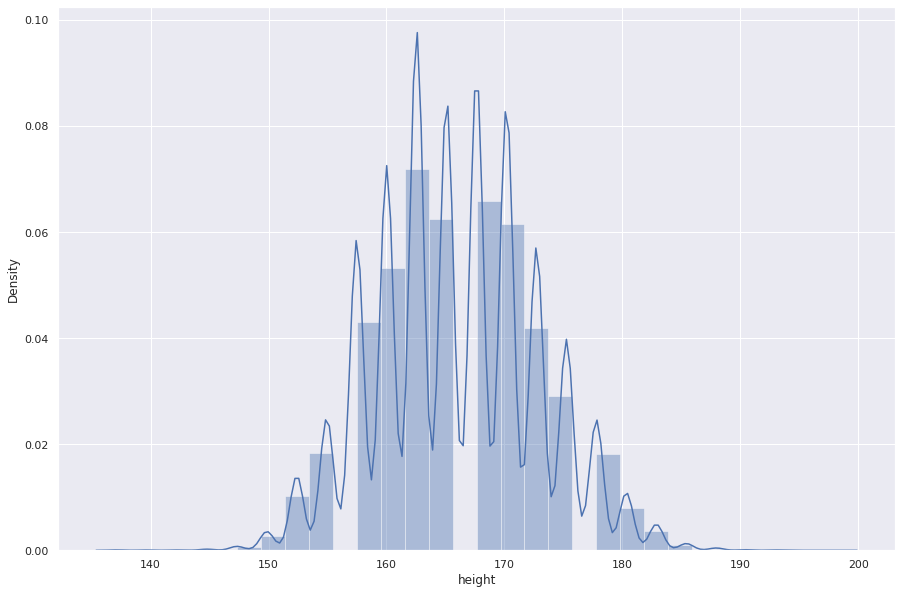

In [ ]:

sns.set(rc = {'figure.figsize':(15,10)})
sns.distplot(rr_df_cp2['height'], bins=30, kde=True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


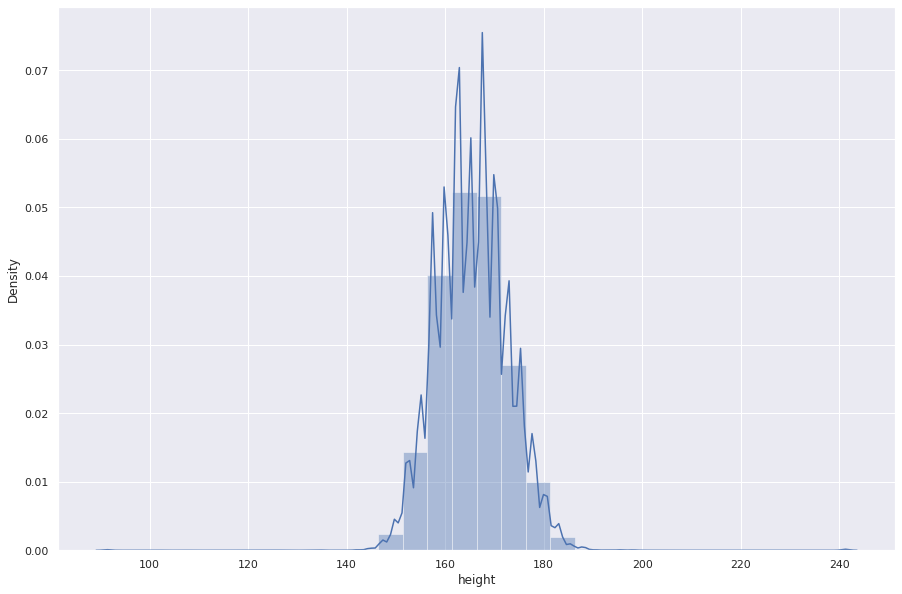

In [ ]:

sns.set(rc = {'figure.figsize':(15,10)})
sns.distplot(mc_df_cp2['height'], bins=30, kde=True)

In [ ]:
rr_df_cp2[(rr_df_cp2['height'] < 140) | (rr_df_cp2['height'] > 190)]

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,cup_size_in_cms
4137,fit,798321,34.0,1213427,81.720,10,wedding,This dress was absolutely stunning. It was lon...,athletic,"Sophisticated, beautiful dress for a wedding",gown,190.50,21,22.0,"April 26, 2016",18.5
15513,fit,89697,34.0,141300,63.560,10,formal affair,"This dress was fantastic! In person, the green...",athletic,I wore this gown to a fundraising event that i...,dress,137.16,8,31.0,"September 13, 2017",14.5
19531,small,921646,34.0,133584,88.530,10,wedding,"It's very fitted, but the length is great. The...",athletic,This dress was perfect for the wedding I atten...,dress,193.04,28,31.0,"February 23, 2014",16.5
19991,small,939979,32.0,799238,68.100,10,wedding,"This dress is absolutely gorgeous, high qualit...",athletic,Classic and elegant.,dress,139.70,16,28.0,"October 24, 2017",14.5
20122,small,459134,36.0,158794,65.830,8,formal affair,It was a really nice dress I got a size 10 bec...,athletic,Didn't wear it but loved it,dress,137.16,20,22.0,"April 24, 2014",14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186196,fit,1725,36.0,197391,62.425,4,party,I got the 12 and the 10 for back up. First the...,hourglass,Blah..not for me.,dress,190.50,24,41.0,"October 9, 2014",18.5
187569,fit,948954,32.0,1256434,70.370,8,party,I liked this dress but it was a little short ....,straight & narrow,"I felt great in this dress, very sexy!",dress,193.04,8,29.0,"October 25, 2017",18.5
189639,fit,94813,32.0,134393,56.750,10,party,I usually wear a 0 because I have a small wais...,hourglass,"Very feminine, cute & worth the prize!",dress,139.70,1,28.0,"February 10, 2016",12.5
189700,fit,173019,NaN,2443818,NaN,10,date,perfect fit,NaN,"Love, love",top,137.16,14,43.0,"May 21, 2016",NaN


In [ ]:
mc_df_cp2[(mc_df_cp2['height'] < 140) | (mc_df_cp2['height'] > 190)]

,item_id,waist,size,rating,hips,bust_size,category,height,user_name,length,fit,user_id,review_summary,review_text,cup_size_in_cms
995,153494,28.000000,8,6,37.686366,34.000000,new,132.08,sina.bilfjord,just right,fit,674109,This dress was my favorit,This dress was my favorite one in my modcloth ...,14.500000
2317,161514,35.000000,12,10,60.000000,48.000000,dresses,241.30,bandnerd2522,just right,fit,708288,I absolutely love this dr,"I absolutely love this dress, I own it in 3 co...",32.500000
2586,161592,30.000000,11,10,39.500000,35.478261,dresses,127.00,Lcn_,just right,fit,526944,Beautiful dress!,I bought this dress for my wedding and I loved...,17.108696
3581,163558,NaN,8,6,60.000000,48.000000,dresses,241.30,colmaggie,just right,small,618585,Love the dress. I feel it,Love the dress. I feel it runs a tad small.,20.500000
3777,163558,42.711111,32,8,56.000000,48.000000,dresses,91.44,jcrodier,just right,fit,386108,.,.,20.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69351,768741,35.000000,15,10,60.000000,48.000000,bottoms,241.30,bandnerd2522,just right,fit,708288,These are great leggings,These are great leggings to change up the norm...,32.500000
71519,785517,26.000000,4,10,35.000000,34.000000,outerwear,127.00,Kristin,just right,fit,10766,Glad I listened to the re,Glad I listened to the reviews and got the S i...,12.500000
72228,792842,32.179167,12,8,60.000000,48.000000,outerwear,241.30,bandnerd2522,just right,small,810539,I need blazers to wear ov,I need blazers to wear over some of my dresses...,32.500000
72590,796383,32.179167,12,8,60.000000,48.000000,outerwear,241.30,bandnerd2522,just right,small,810539,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ...",32.500000


In [ ]:
mc_df_cp2.drop(mc_df_cp2[(mc_df_cp2['height'] < 140) | (mc_df_cp2['height'] > 190)].index, inplace = True)
rr_df_cp2.drop(rr_df_cp2[(rr_df_cp2['height'] < 140) | (rr_df_cp2['height'] > 190)].index, inplace = True)

### 데이터 2차 전처리(Data imputing 및 합치기)

In [ ]:
mc_df_cp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74542 entries, 0 to 74641
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74542 non-null  int64  
 1   waist            55280 non-null  float64
 2   size             74542 non-null  int64  
 3   rating           74542 non-null  int64  
 4   hips             67362 non-null  float64
 5   bust_size        72583 non-null  float64
 6   category         74542 non-null  object 
 7   height           74542 non-null  float64
 8   user_name        74542 non-null  object 
 9   length           74518 non-null  object 
 10  fit              74542 non-null  object 
 11  user_id          74542 non-null  int64  
 12  review_summary   74542 non-null  object 
 13  review_text      74542 non-null  object 
 14  cup_size_in_cms  72523 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 9.1+ MB


In [ ]:
rr_df_cp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191136 entries, 0 to 191222
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              191136 non-null  object 
 1   user_id          191136 non-null  int64  
 2   bust_size        181964 non-null  float64
 3   item_id          191136 non-null  int64  
 4   weight           179406 non-null  float64
 5   rating           191136 non-null  int64  
 6   rented_for       191136 non-null  object 
 7   review_text      191136 non-null  object 
 8   body_type        176687 non-null  object 
 9   review_summary   191136 non-null  object 
 10  category         191136 non-null  object 
 11  height           191136 non-null  float64
 12  size             191136 non-null  int64  
 13  age              190192 non-null  float64
 14  review_date      191136 non-null  object 
 15  cup_size_in_cms  180801 non-null  float64
dtypes: float64(5), int64(4), object(7)
mem

In [ ]:
#imputing 은 데이터 위치 기준 근접한 이웃컬럼의 값의 평균으로 대체하므로 엉뚱한 값이 들어올 확률이 높으므로 skip

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
mc_data_knn_ind_features = mc_df_cp2[['waist','hips', 'bust_size', 'height', 'cup_size_in_cms']]

df_filled = imputer.fit_transform(mc_data_knn_ind_features)

knn_numeric_imputations = pd.DataFrame(data=df_filled, columns=['waist','hips', 'bust_size', 'height', 'cup_size_in_cms'],index = mc_df_cp2.index)

mc_df_cp3 = mc_df_cp2.drop(['waist','hips', 'bust_size', 'height', 'cup_size_in_cms'], axis=1)

mc_df_cp3 = pd.concat([mc_df_cp3, knn_numeric_imputations], axis=1)

mc_df_cp3.to_excel('mc_df_cp3_imputed.xlsx', index = False)


from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
mc_data_knn_ind_features = rr_df_cp2[['bust_size','weight', 'cup_size_in_cms']]

df_filled = imputer.fit_transform(mc_data_knn_ind_features)

knn_numeric_imputations = pd.DataFrame(data=df_filled, columns=['bust_size','weight', 'cup_size_in_cms'],index = rr_df_cp2.index)

rr_df_cp3 = rr_df_cp2.drop(['bust_size','weight', 'cup_size_in_cms'], axis=1)

rr_df_cp3 = pd.concat([rr_df_cp3, knn_numeric_imputations], axis=1)

#rr_df_cp3.to_excel('rr_df_cp3_imputed.xlsx', index = False)


mc_rr_df = pd.concat([mc_df_cp3,rr_df_cp3], ignore_index=True)

mc_rr_df.to_excel('modcolth_rentway_integra_data3_imputed.xlsx', index = False)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
mc_data_knn_ind_features = c[['bust_size','weight', 'cup_size_in_cms']]

df_filled = imputer.fit_transform(mc_data_knn_ind_features)

knn_numeric_imputations = pd.DataFrame(data=df_filled, columns=['bust_size','weight', 'cup_size_in_cms'],index = rr_df_cp2.index)

rr_df_cp3 = rr_df_cp3.drop(['waist','hips', 'bust_size'], axis=1)

rr_df_cp3 = pd.concat([rr_df_cp3, knn_numeric_imputations], axis=1)

#rr_df_cp3.to_excel('rr_df_cp3.xlsx', index = False)

rr_df_cp3.isnull().sum()

rr_df_cp3.head()

In [ ]:
mc_rr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265678 entries, 0 to 265677
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          265678 non-null  int64  
 1   size             265678 non-null  int64  
 2   rating           265678 non-null  int64  
 3   category         265678 non-null  object 
 4   user_name        74542 non-null   object 
 5   length           74518 non-null   object 
 6   fit              265678 non-null  object 
 7   user_id          265678 non-null  int64  
 8   review_summary   265678 non-null  object 
 9   review_text      265678 non-null  object 
 10  waist            74542 non-null   float64
 11  hips             74542 non-null   float64
 12  bust_size        265678 non-null  float64
 13  height           265678 non-null  float64
 14  cup_size_in_cms  265678 non-null  float64
 15  rented_for       191136 non-null  object 
 16  body_type        176687 non-null  obje

In [ ]:
rr_df_cp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191136 entries, 0 to 191222
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fit              191136 non-null  object 
 1   user_id          191136 non-null  int64  
 2   item_id          191136 non-null  int64  
 3   rating           191136 non-null  int64  
 4   rented_for       191136 non-null  object 
 5   review_text      191136 non-null  object 
 6   body_type        176687 non-null  object 
 7   review_summary   191136 non-null  object 
 8   category         191136 non-null  object 
 9   height           191136 non-null  float64
 10  size             191136 non-null  int64  
 11  age              190192 non-null  float64
 12  review_date      191136 non-null  object 
 13  bust_size        191136 non-null  float64
 14  weight           191136 non-null  float64
 15  cup_size_in_cms  191136 non-null  float64
dtypes: float64(5), int64(4), object(7)
mem

In [ ]:
mc_df_cp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74542 entries, 0 to 74641
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          74542 non-null  int64  
 1   size             74542 non-null  int64  
 2   rating           74542 non-null  int64  
 3   category         74542 non-null  object 
 4   user_name        74542 non-null  object 
 5   length           74518 non-null  object 
 6   fit              74542 non-null  object 
 7   user_id          74542 non-null  int64  
 8   review_summary   74542 non-null  object 
 9   review_text      74542 non-null  object 
 10  waist            74542 non-null  float64
 11  hips             74542 non-null  float64
 12  bust_size        74542 non-null  float64
 13  height           74542 non-null  float64
 14  cup_size_in_cms  74542 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 9.1+ MB


In [ ]:
#mc_df_cp.drop(mc_df_cp[mc_df_cp['size'] >= 20].index, inplace = True)

#rr_df_cp.drop(rr_df_cp[rr_df_cp['size'] >= 20].index, inplace = True)

NameError: ignored

In [ ]:

#mc_df_cp.drop(mc_df_cp[np.isnan(mc_df_cp['bust_size'])].index, inplace = True)

#mc_df_cp.drop(['length'], axis = 1, inplace = True)

mc_rr_df = pd.concat([mc_df_cp2,rr_df_cp2], ignore_index=True)

In [ ]:

mc_rr_df = pd.concat([mc_df_cp2,rr_df_cp2], ignore_index=True)

os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')

#mc_rr_df.to_excel('modcolth_rentway_integra_data3.xlsx', index = False)

#mc_df_cp2.to_excel('mc_df_cp3.xlsx', index = False)

#rr_df_cp2.to_excel('rr_df_cp3.xlsx', index = False)


mc_df_cp2 = pd.read_excel('mc_df_cp2.xlsx')
rr_df_cp2 = pd.read_excel('rr_df_cp2.xlsx')

mc_rr_df_read = pd.read_excel('modcolth_rentway_integra_data2.xlsx')

In [ ]:
mc_rr_df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265678 entries, 0 to 265677
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          265678 non-null  int64  
 1   waist            55280 non-null   float64
 2   size             265678 non-null  int64  
 3   rating           265678 non-null  int64  
 4   hips             67362 non-null   float64
 5   bust_size        254547 non-null  float64
 6   category         265678 non-null  object 
 7   height           265678 non-null  float64
 8   user_name        74542 non-null   object 
 9   length           74518 non-null   object 
 10  fit              265678 non-null  object 
 11  user_id          265678 non-null  int64  
 12  review_summary   265678 non-null  object 
 13  review_text      265678 non-null  object 
 14  cup_size_in_cms  253324 non-null  float64
 15  weight           179406 non-null  float64
 16  rented_for       191136 non-null  obje